# **Capstone project scenario overview: Working for Salifort Motors**  

# Project Context and Summary 

Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. 

Currently,there is a high rate of turnover among Salifort employees. **(Note: In this context, turnover data includes both employees who choose to quit their job and employees who are let go)**. 

Salifort survey a sample of employees to learn more about what might be driving the turnover. 

In this project the survey will be analyzed to come up with ideas for how to increase employee retention. 


The steps for this project are the following: 

>1. Define project scope
2. Project Requirements
3. Plan Stage 
    - Step 1: Imports 
    - Step 2: Data Gathering
3. EDA 
    - Step 1: Data Exploration I (Initial EDA and data cleaning)
    - Step 2: Data Exploration II 
    - Step 3: Model Building 
    - Step 4: Results and Evaluation 
4. Conclusion and Recommendations 


## Project Scope

Analyze survey data about employees in Salifort Motors and design a model that predicts whether an employee will leave the company based on their `department`, `number of projects`,`averaged monthly hours` and any other data points that might be useful for this analysis. 


## Project Requirements

The project is run in a Jupyter Notebook and requires certain libraries, packages and modules to work. If you don't have some of them, then you need to install them using pip install commands. 

## Plan Stage
### Step 1: Imports

In [174]:
# Get data from kaggle
import kaggle

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Saving models
import pickle

### Step 2: Data Gathering 

**Data Source** 

1. HR_comma_sep.csv : The dataset is sourced from Kaggle you can access the file here. 

**Data Gathering**

In [4]:
!kaggle datasets download --force -p "D:\Proyectos_Personales\Salifort_Motors" --unzip mfaisalqureshi/hr-analytics-and-job-prediction


  0%|          | 0.00/110k [00:00<?, ?B/s]
100%|##########| 110k/110k [00:00<00:00, 137kB/s]
100%|##########| 110k/110k [00:00<00:00, 137kB/s]


**Load Dataset**

In [255]:
# load dataset into a dataframe
df_original = pd.read_csv("D:\Proyectos_Personales\Salifort_Motors\HR_capstone_dataset.csv")

# Display first few rows of the dataframe

df_original.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## EDA
### Step 1: Data Exploration I (Initial EDA and data cleaning)
- Understand variables
- Clean dataset (missing data, redundant data, outliers, rename variables, set data types)

**Basic Information about the data**

In [256]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


> **Notes**  
  **Data types** : Integer, Float and Object.  
  **Null Data?**: No  
  **Total Rows and Columns?**: 14999 rows and 10 columns  

**Descriptive Statistics**

In [257]:
df_original.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


> By looking at the 75% quartile we can see that 75% of the employees have been in the company for less than 4 years, and the average is around 3.5 years.  
There seem to be some outliers in the `time_spend_company` variable.

**Column Names** 
- All column names in `snake_case`
- Fix misspelled columns

In [258]:
df_original.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [259]:
# All lower case
df_original.columns = [x.lower() for x in df0.columns]

#Rename columns as needed

df_original = df_original.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure'})

df_original.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

**Check Missing Values** 
- From the first overview of the data we already know that there's no missing values but let's double check

In [260]:
df_original.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

**Check Duplicates**

In [261]:
df_original.duplicated().sum()

3008

> 3008 rows contain duplicates which represents 20% of the data. Let's look this duplicates in more detail.

In [262]:
df_original[df_original.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [263]:
#Drop duplicates 

df_clean = df_original.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df_clean.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [264]:
df_clean.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Check Ouliers**
- Use Boxplot for visualize distribution of `tenure` and detect any outliers

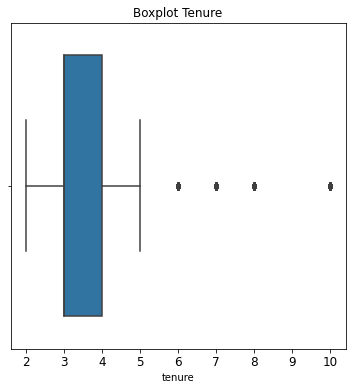

In [265]:
# Boxplot for tenure
plt.figure(figsize=(6,6))
plt.title('Boxplot Tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df_clean['tenure'])
plt.show()

In [266]:
tenure_median= df_clean['tenure'].median()
print(tenure_median)

3.0


> There are a few outliers as we already identified on the descriptive statistics in the beggining of this analysis. There are some eployees that have been in the company for more than 8 years.  
Let's check how many rows in the dataset are outliers.

In [267]:
# Identify rows with outliers --> Get the Upper and Lower limits with thw the 25th and 75th quantile

# Calculate 25th quantile

percentile25 = df_clean['tenure'].quantile(0.25)

# Calculate 75th quantile

percentile75 = df_clean['tenure'].quantile(0.75)

# Calculate IQR

iqr = percentile75 - percentile25

# Upper and Lower Limit 
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Filter outliers 

outliers = df_clean[(df_clean['tenure'] > upper_limit) | (df_clean['tenure'] < lower_limit)]

# Number of rows with outliers
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


### Step 2: Data Exploration II

In [43]:
print('People who left vs stay:')
print(df_clean['left'].value_counts())
print('',sep='/n')
print('People who left vs stay %:')
print(df_clean['left'].value_counts(normalize=True)*100)

People who left vs stay:
0    10000
1     1991
Name: left, dtype: int64

People who left vs stay %:
0    83.39588
1    16.60412
Name: left, dtype: float64


**Explore relationships between variables and data distribution**
- **`left`**
    - `tenure`
    - `number_project`
    - `average_monthly_hours`
    - `department`
    - `promotion_last_5years`
    - `satisfaction_level`
    
1. Satisfaction level by department 
2. Monthly hours by department
2. Satisfaction level by tenure
3. Tenure and promotion
2. Relationship between people who left and average monthly hours 

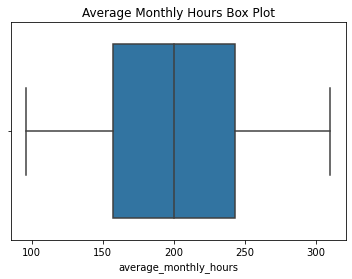

In [57]:
sns.boxplot(data=df_clean, x=df_clean['average_monthly_hours'])
plt.title('Average Monthly Hours Box Plot');

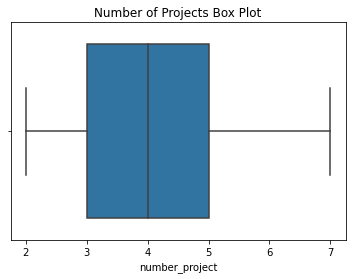

In [56]:
sns.boxplot(data=df_clean, x=df_clean['number_project'])
plt.title('Number of Projects Box Plot');

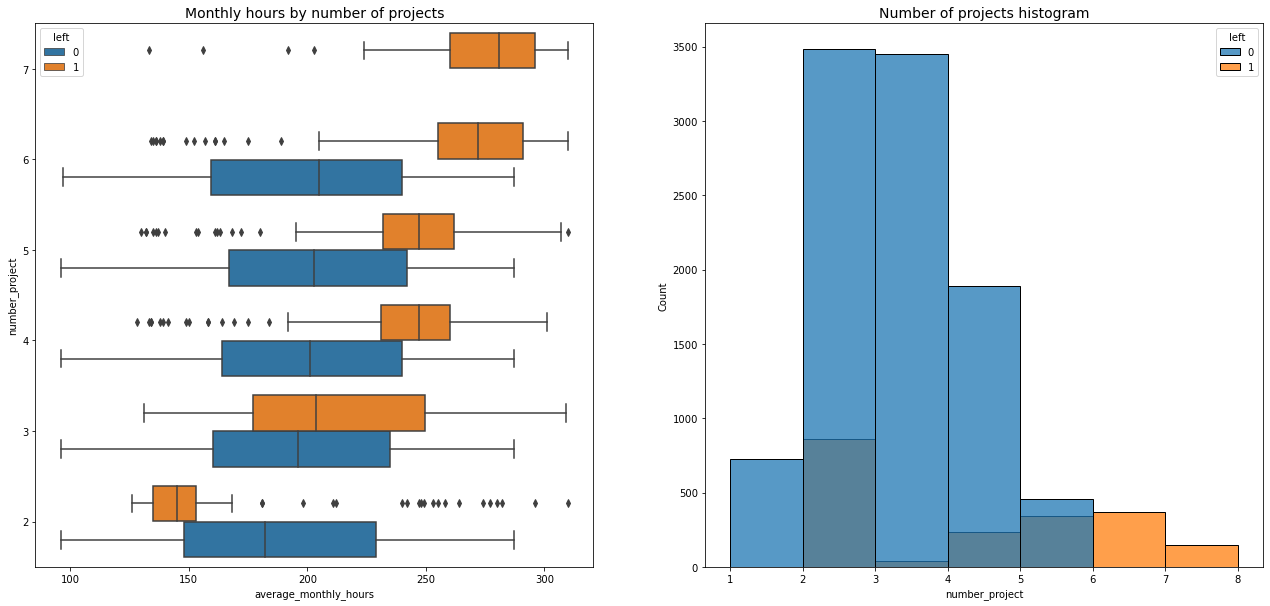

In [143]:
# Box Plot 1: number of project and average monthly hours by who stayed and left
# Box Plot 2: number of projects and by who stayed and left

fig, ax = plt.subplots(1, 2, figsize = (22,10))
sns.boxplot(data=df_clean, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df_clean[df_clean['left']==0]['number_project']
tenure_left = df_clean[df_clean['left']==1]['number_project']

sns.histplot(data=df_clean, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1],discrete=True )
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

- In the Boxplot we can see that people with 7 projects and an average monthly hours over 250 all left the company.  
- On the other hand, there's a group who worked on 2 projects and worked less than a average of 150 hours a month who also left the company.  

    - From these two points we can infere that there are two main groups of people who left the company:
        1. Those who worked considerably less than the rest of the employees.
        2. Those who worked considerably more than the rest of the employees.


- Now, something that is consistent among all groups, with exception of the employees who worked on two projects, is that every group is working more than 170 hours a month. In average, considering a work week of 40 hours and 15 days of vacations, the employees should be working around 166 hours a month. This means that every group with exception of the one with 2 projects is working considerably more than this, which make us think that the employees are overworked. 


- It would be interesting to know if all the people with seven projects left. 

Text(0.5, 1.0, 'Last Evaluation and Satisfaction Level')

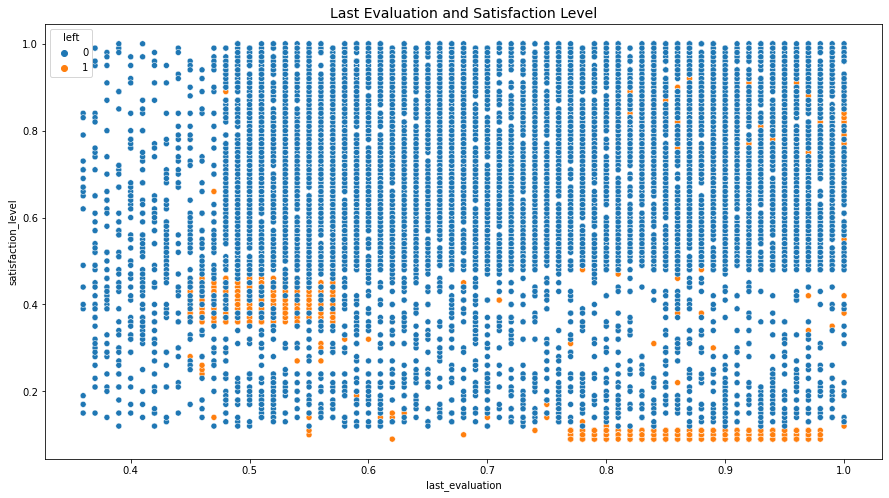

In [231]:
fig, ax = plt.subplots(figsize = (15,8))
sns.scatterplot(data=df_clean, x="last_evaluation", y="satisfaction_level", hue="left")
ax.set_title('Last Evaluation and Satisfaction Level', fontsize='14')

Text(0.5, 1.0, 'Last evaluation and Average montthly hours')

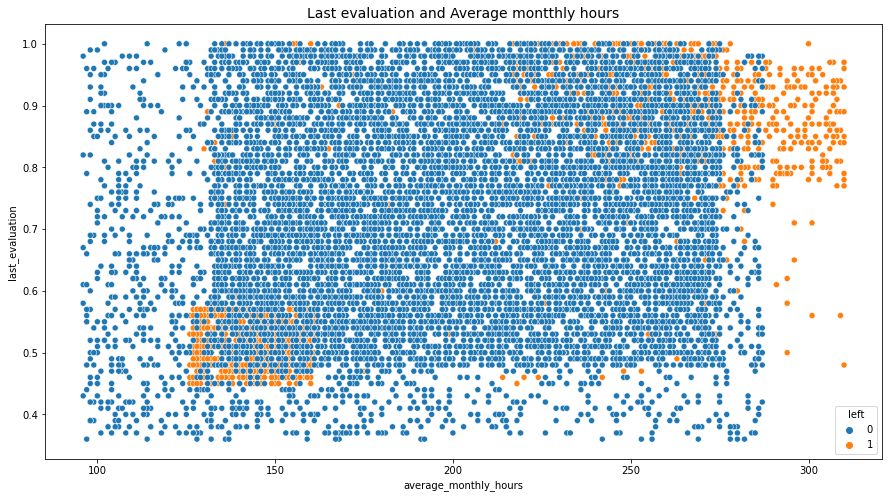

In [232]:
fig, ax = plt.subplots(figsize = (15,8))
sns.scatterplot(data=df_clean, x="average_monthly_hours", y="last_evaluation", hue="left")
ax.set_title('Last evaluation and Average montthly hours', fontsize='14')

In [134]:
tenure_satisfaction_level = df_clean.groupby(["tenure"])["satisfaction_level"].mean().round(3).reset_index()

fig = px.line(tenure_satisfaction_level, x='tenure', y='satisfaction_level',markers=True,text="satisfaction_level")
fig.update_traces(textposition="bottom right",
                 line_color='#488A99')
fig.update_layout(title='Average Satisfaction Level by Tenure',
                   xaxis_title='Tenure',
                   yaxis_title='Satisfaction Level')
fig.show()

In [165]:
median_sat_lvl = df_clean['satisfaction_level'].median()
mean_sat_lvl = df_clean['satisfaction_level'].mean()
print('Satifaction Level median:')
print(round(median_sat_lvl,2))

print('Satifaction Level mean:')
print(round(mean_sat_lvl,2))

median_tenure = df_clean['tenure'].median()
mean_tenure = df_clean['tenure'].mean()
print('Tenure median:')
print(round(median_tenure,2))

print('Tenure mean:')
print(round(mean_tenure,2))

Satifaction Level median:
0.66
Satifaction Level mean:
0.63
Tenure median:
3.0
Tenure mean:
3.36


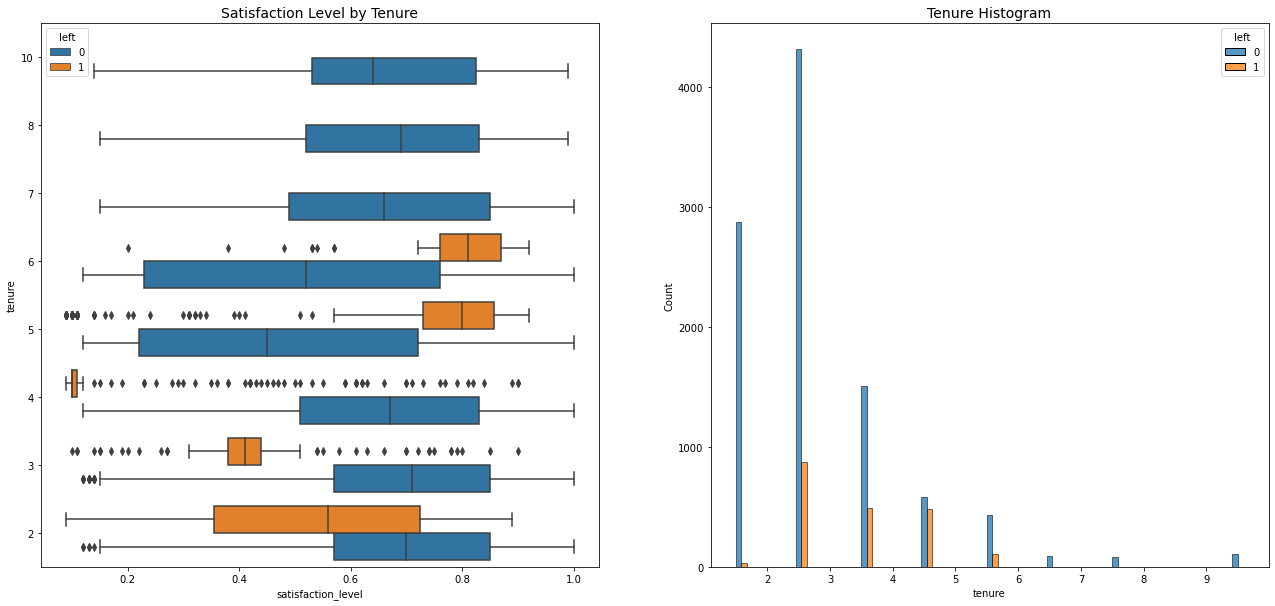

In [163]:
# Box Plot: Satisfaction Level by Tenure
#fig, ax = plt.subplots(figsize = (15,8))

fig, ax = plt.subplots(1, 2, figsize = (22,10))
sns.boxplot(data=df_clean, x='satisfaction_level', y='tenure', hue='left', orient="h",ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction Level by Tenure', fontsize='14')

#Historgram Satisfaction Level
tenure_stay = df_clean[df_clean['left']==0]['satisfaction_level']
tenure_left = df_clean[df_clean['left']==1]['satisfaction_level']

sns.histplot(data=df_clean, x='tenure', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Tenure Histogram', fontsize='14')

# Display the plots
plt.show()

- We can see from the scatter plot and box plot, that there's a group who has been around 4 years in the company showing the lowest satisfaction levels. Another group that's been a longer time (over 7 years) shows better satisfaction levels.


- Now if we look at the histogram for tenure, considering that the median is 3, half of the values are below 3 years. 

In [216]:
df_clean['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

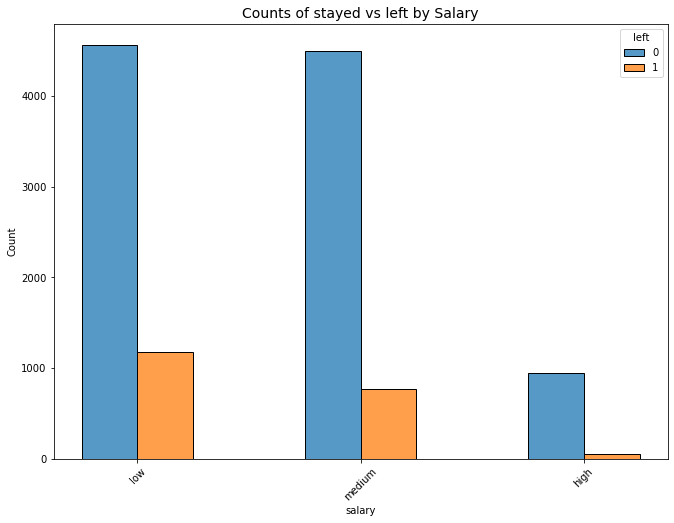

In [226]:
plt.figure(figsize=(11,8))
sns.histplot(data=df_clean, x='salary', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed vs left by Salary', fontsize=14);

In [120]:
# Bar chart 1: by department and left
df_group = df_clean.groupby(['department','left'])['number_project'].sum().sort_values(ascending=False).reset_index()
df_group['left'] = df_group['left'].astype(str)
#sns.barplot(df_group, x="department", y=df_group.index)
# Bar chart 2: by department and stasifaction_level
color_mapping = {'1' : '#DADADA',
                 '0':'#488A99' }

fig= px.bar(df_group, x="department", y="number_project", width=1000, height=600,color_discrete_map=color_mapping,color="left",text="number_project")
fig.update_layout(title='Department by Number of projects',
                   xaxis_title='Department',
                   yaxis_title='Number of projects',
                   font=dict(
                    size=18,  # Set the font size here
                    color="Black"
    ))
fig.update_traces(textfont_size=25)
fig.show()

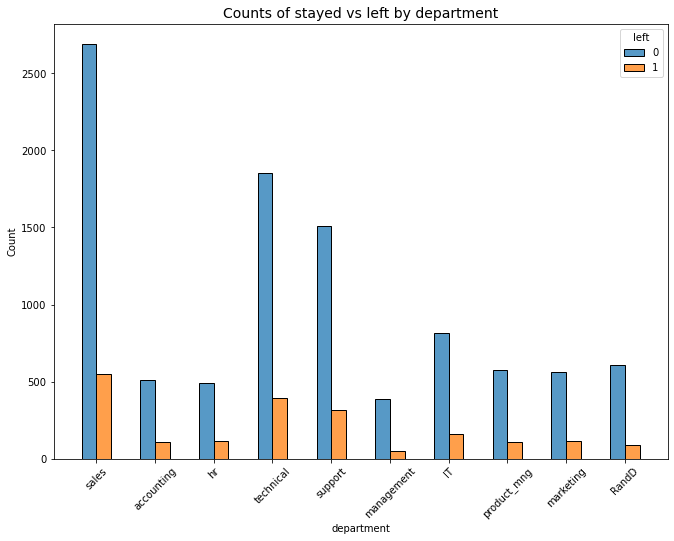

In [194]:
# Bar chart 1: by department and left
plt.figure(figsize=(11,8))
sns.histplot(data=df_clean, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed vs left by department', fontsize=14);

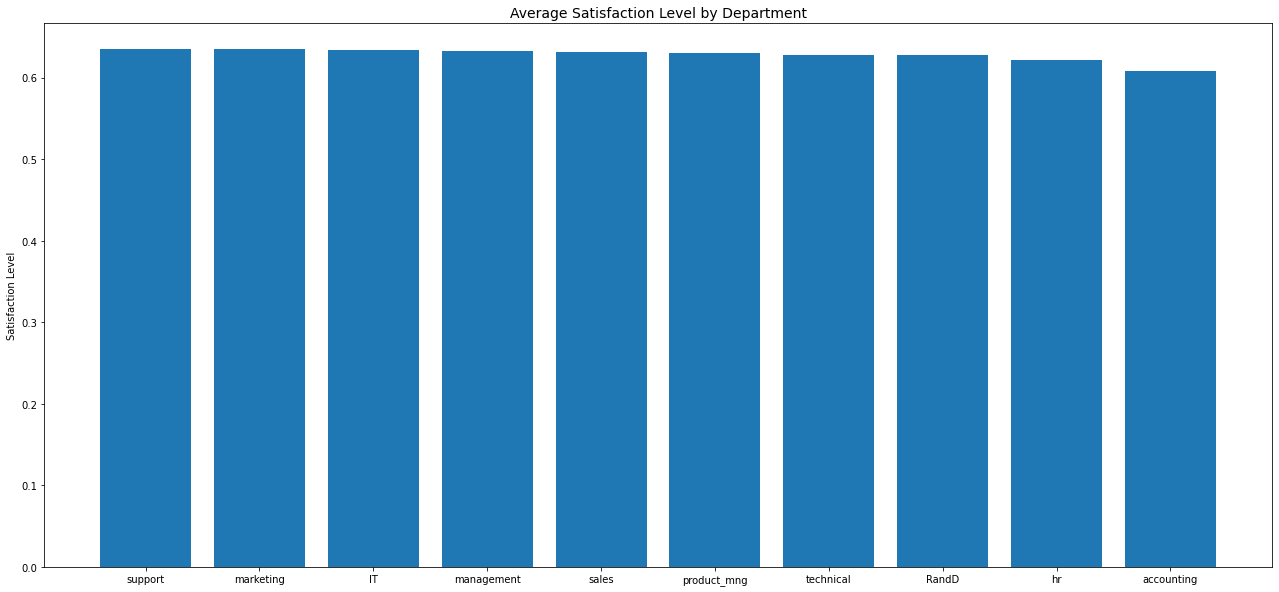

In [121]:
df_sat_dep = df_clean.groupby(["department"])["satisfaction_level"].mean().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(figsize = (22,10))
ax.bar(df_sat_dep['department'], df_sat_dep['satisfaction_level'])
ax.set_ylabel('Satisfaction Level')
ax.set_title('Average Satisfaction Level by Department', fontsize='14')
#ax.legend(title='Department')
plt.show()

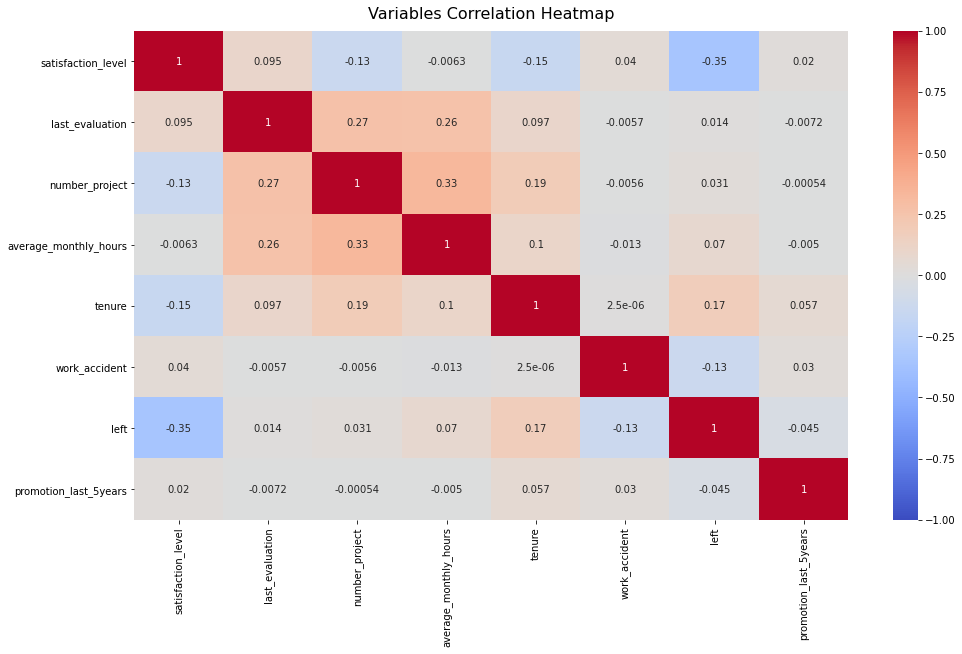

In [268]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_clean.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Variables Correlation Heatmap', 
                  fontdict={'fontsize':16}, 
                  pad=12)
plt.show();

> Variables are **not strongly multicollinear** since their correlation coefficient values are low (below 0.3)

**Insights**

### Step 3: Model Building

**Question to answer: Predict whether an employee will leave the company based on certain variables**  
*Outcome*: Binary and categorical, the employee either leaves or stays. Target variable can take only one of two values. 

Dependent Variable (Y): `left` --> this is the one we want to predict (Target variable)

Independent Variables (X - Predictor Variables):   
    - `average_monthly_hours`  
    - `last_evaluation`  
    - `number_project`    
    - `satisfaction_level`  
    - `tenure`  
    - `work_accident`  
    - `promotion_last_5years`  
    - `department`  
    - `salary`  

Target variable is categorical and binary, this implies the models that would fit best this problem could be:

1. Logistic Regression - (binary classification / stay or left) 
2. Tree-based Machine Learning model (Random Forest)

### First Aproach: Logistic Regression Model

**Logistic Regression Model Assumptions**
- Dependent variable (Y) is categorical -> **Ok**
- Linearity between each X variable and the logit of the outcome variable -> **Check at the end**
- Observations independent of each other -> **Ok**
- No extreme multicollinearity between X variables -> **Ok, checked with heatmap**
- No extreme ouliers -> **Handle outliers in tenure**

**Handle categorical predictor variables**
- `salary` : ordinal, there's a hierarchy so it's better to convert the levels (Low, Medium, High) to numbers (0,1,2)
- `department`: no hierarchy, we can dummy it for modeling. 

In [275]:
df_clean_enc = df_clean.copy()
# Encode `salary` column as an ordinal numeric category
df_clean_enc['salary'] = (
    df_clean['salary'].astype('category').
    cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_clean_enc = pd.get_dummies(df_clean_enc, drop_first=False)

# Display df first rows
df_clean_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


**Hanlde Outliers in Tenure**

There are 824 rows with outliers in the `tenure` variable. This is 6.87% of the dataset, so in this ocation we are going to drop these values for the model. 

In [276]:
# Filter out rows with outliers
df_log_model = df_clean_enc[(df_clean_enc['tenure'] >= lower_limit) & (df_clean_enc['tenure'] <= upper_limit)]

# Display df first rows
df_log_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


**Logistic Regression Model Approach**

In [279]:
# Isolate target variable
y = df_log_model['left']

In [280]:
# Isolate predictor variables
X = df_log_model.drop(columns = ['left'])
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [281]:
# Split the data into train and test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [282]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
9784,0.43,0.81,3,102,3,0,0,1,0,0,0,0,0,0,0,1,0,0
6535,0.74,0.68,3,206,2,1,0,1,0,0,0,0,0,0,0,0,1,0
5217,0.87,0.50,4,267,2,1,0,1,0,0,1,0,0,0,0,0,0,0
8421,0.61,0.56,2,123,2,0,0,1,0,0,0,0,0,0,0,1,0,0
6134,0.65,0.79,4,196,2,0,0,1,0,0,1,0,0,0,0,0,0,0


In [283]:
# Initiate logistic regression model 

model = LogisticRegression(penalty='none', max_iter=400)

model.fit(X_train, y_train)

LogisticRegression(max_iter=400, penalty='none')

In [284]:
# Get coefficients of each variable

pd.Series(model.coef_[0], index=X.columns)

satisfaction_level       -4.442321
last_evaluation           0.009547
number_project           -0.494469
average_monthly_hours     0.003669
tenure                    1.115659
work_accident            -1.542954
promotion_last_5years    -1.423135
salary                   -0.522497
department_IT            -0.102327
department_RandD         -0.364403
department_accounting    -0.333200
department_hr            -0.024752
department_management    -0.228517
department_marketing     -0.142617
department_product_mng   -0.128920
department_sales          0.020943
department_support        0.017938
department_technical     -0.001172
dtype: float64

In [285]:
# Intercept of the model 

model.intercept_

array([-1.28702686])

In [286]:
# Get predicted probabilities of the training data 

training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.81049039, 0.18950961],
       [0.99400943, 0.00599057],
       [0.99818989, 0.00181011],
       ...,
       [0.91190839, 0.08809161],
       [0.95676229, 0.04323771],
       [0.9820786 , 0.0179214 ]])

**Check linear relationship between predictor variable and logit(x)**

In [287]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

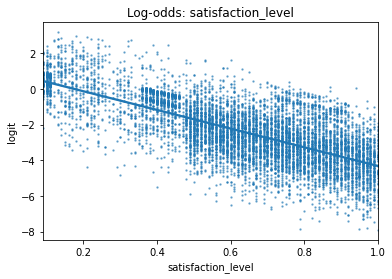

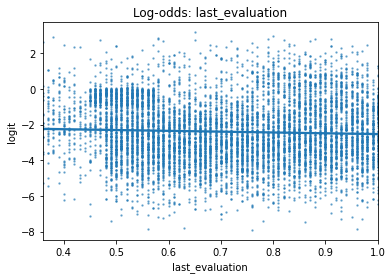

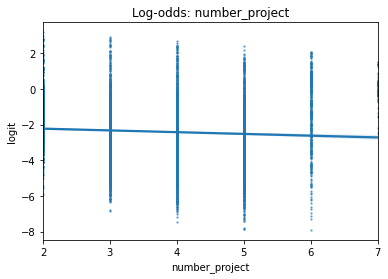

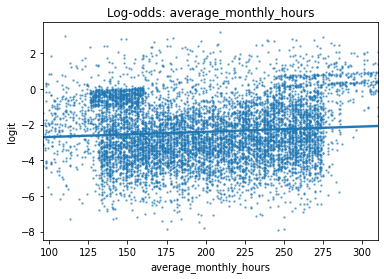

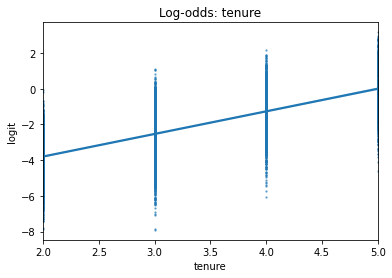

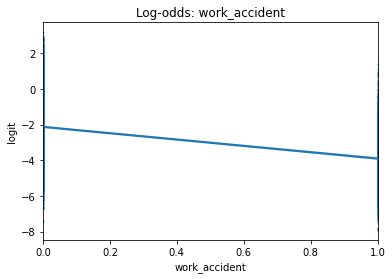

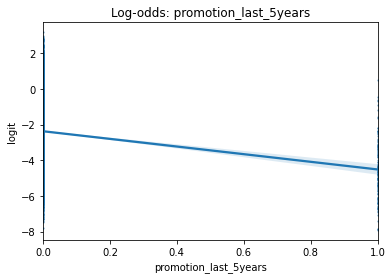

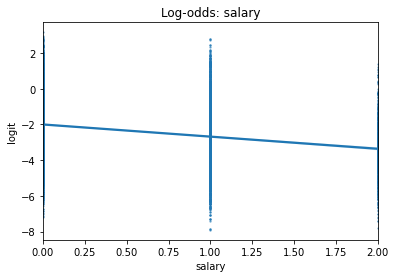

In [289]:
# Plot regplot of `activity_days` log-odds
for variable in ['satisfaction_level', 'last_evaluation', 'number_project','average_monthly_hours', 'tenure', 'work_accident','promotion_last_5years','salary']:
    sns.regplot(x=variable, y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
    plt.title('Log-odds: ' + variable)
    plt.show();

**Logistic Regression Results and Evaluation**

In [290]:
# Generate predictions on X_test
y_preds = model.predict(X_test)

In [291]:
# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8209169054441261

In [294]:
cm = confusion_matrix(y_test, y_preds, labels=model.classes_)

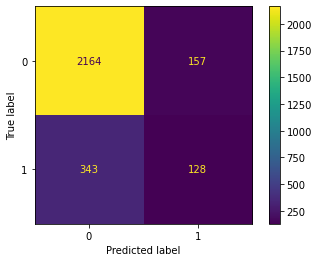

In [295]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=model.classes_
                              )
disp.plot()

plt.show();

In [296]:
df_log_model['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

**Note:** Data is not perfectly balanced (83%-17% split)

In [297]:
# Classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_preds, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.27      0.34       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.60      0.62      2792
             weighted avg       0.79      0.82      0.80      2792



**Note:** The model has mediocre precision and low recall when it comes to predict employess who leave. It makes a lot of false negative predictions, therefore it fails to capture employees who would leave. 

In [298]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('tenure', 1.1156587117343304),
 ('department_sales', 0.02094253652841492),
 ('department_support', 0.01793835957390895),
 ('last_evaluation', 0.009546686824874992),
 ('average_monthly_hours', 0.003669396478673233),
 ('department_technical', -0.0011718620282731873),
 ('department_hr', -0.024751855099651842),
 ('department_IT', -0.10232739277187906),
 ('department_product_mng', -0.12892017371920422),
 ('department_marketing', -0.1426165107655447),
 ('department_management', -0.22851674464969335),
 ('department_accounting', -0.33320001721043624),
 ('department_RandD', -0.3644031997753999),
 ('number_project', -0.49446930107295745),
 ('salary', -0.522496911008636),
 ('promotion_last_5years', -1.4231347494618898),
 ('work_accident', -1.5429540565094306),
 ('satisfaction_level', -4.442320866117976)]

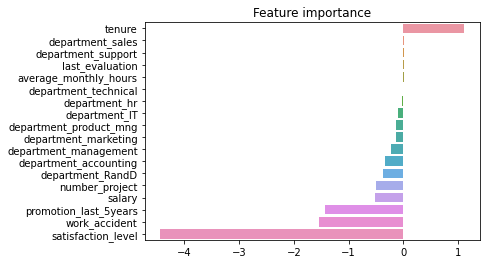

In [299]:
# Plot the feature importances
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

- One option to improve the model might be to use a variable selection method like backward selection and check if the model performs better.
- Also, transform some variables like `average_monthly_hours` to a binary variable (overworked or not overworked)

### Second Aproach: Tree-based Model / Random Forest
- Implementation of Decision Tree
- Random Forest